## Chapter 21:

  Object Detection in CIFAR-10 Dataset

In [0]:
# Import modules
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from PIL import Image

'1.4.1'

In [0]:
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


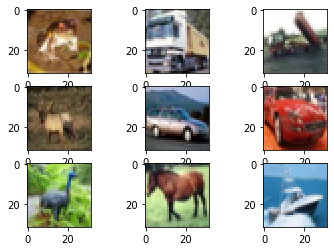

In [0]:
# Create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(Image.fromarray(X_train[i]))
# Show the plot
plt.show()

In [0]:
# Import modules for CNN
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')

In [0]:
# fix seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# Load Data
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
# Normalize inputs from 0 - 255 to 0.0 - 1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# Create simple convnet
def simple_CNN():
  model = Sequential()
  model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(32, 32, 3), kernel_constraint=maxnorm(3), padding='same'))
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3,3), activation='relu', kernel_constraint=maxnorm(3), padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile
  epochs = 25
  lrate = 0.01
  decay = lrate/epochs
  sgd = SGD(lr=lrate, momentum=0.8, decay=decay)
  model.compile(loss = 'categorical_crossentropy', optimizer=sgd, metrics= ['accuracy'])
  return model

# Instantiate the model and check the model summary
model = simple_CNN()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [0]:
# Fit your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/25





 - 22s - loss: 1.7245 - acc: 0.3758 - val_loss: 1.4094 - val_acc: 0.4967
Epoch 2/25
 - 8s - loss: 1.3823 - acc: 0.5031 - val_loss: 1.2437 - val_acc: 0.5605
Epoch 3/25
 - 8s - loss: 1.2252 - acc: 0.5627 - val_loss: 1.1611 - val_acc: 0.5841
Epoch 4/25
 - 8s - loss: 1.1164 - acc: 0.6046 - val_loss: 1.0728 - val_acc: 0.6197
Epoch 5/25
 - 8s - loss: 1.0408 - acc: 0.6321 - val_loss: 1.0349 - val_acc: 0.6312
Epoch 6/25
 - 8s - loss: 0.9733 - acc: 0.6534 - val_loss: 0.9950 - val_acc: 0.6490
Epoch 7/25
 - 8s - loss: 0.9183 - acc: 0.6759 - val_loss: 0.9780 - val_acc: 0.6554
Epoch 8/25
 - 8s - loss: 0.8701 - acc: 0.6942 - val_loss: 0.9664 - val_acc: 0.6631
Epoch 9/25
 - 8s - loss: 0.8198 - acc: 0.7121 - val_loss: 0.9571 - val_acc: 0.6631
Epoch 10/25
 - 8s - loss: 0.7825 - acc: 0.7240 - val_loss: 0.9388 - val_acc: 0.6759
Epoch 11/25
 - 8

In [0]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.2f%%'%(scores[1]*100))

Accuracy: 69.76%


In [0]:
# Create a larger Convnet
def larger_CNN():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape= (32, 32, 3)))
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128, (3, 3), padding= 'same', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3,3), padding = 'same', activation= 'relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))
  # compile model
  epochs = 25
  lrate = 0.01
  decay = lrate/epochs
  sgd = SGD(lr = lrate, momentum=0.8, decay=decay)
  model.compile(loss = 'categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

In [0]:
# Call the model and get the summary
model = larger_CNN()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

In [0]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 182us/step - loss: 2.0161 - acc: 0.2547 - val_loss: 1.8087 - val_acc: 0.3555
Epoch 2/25
50000/50000 [==============================] - 8s 167us/step - loss: 1.6434 - acc: 0.3979 - val_loss: 1.5211 - val_acc: 0.4609
Epoch 3/25
50000/50000 [==============================] - 8s 164us/step - loss: 1.4752 - acc: 0.4668 - val_loss: 1.4667 - val_acc: 0.4726
Epoch 4/25
50000/50000 [==============================] - 8s 162us/step - loss: 1.3749 - acc: 0.5015 - val_loss: 1.3364 - val_acc: 0.5125
Epoch 5/25
50000/50000 [==============================] - 8s 160us/step - loss: 1.2961 - acc: 0.5333 - val_loss: 1.2130 - val_acc: 0.5633
Epoch 6/25
50000/50000 [==============================] - 8s 170us/step - loss: 1.2290 - acc: 0.5570 - val_loss: 1.1620 - val_acc: 0.5836
Epoch 7/25
50000/50000 [==============================] - 8s 166us/step - loss: 1.1696 - acc: 0.5797 - val_loss: 1.1031 - 

In [0]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.2f%%'%(scores[1]*100))

Accuracy: 73.48%


## Chapter 22:
  Predict Sentiment from Movie Reviews

In [0]:
# import modules
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 3s 0us/step


In [3]:
# Concatenate the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [4]:
# check train samples
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [5]:
# Check test samples
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [16]:
# Concatenate train and test sets
X = np.concatenate((X_train, X_test), axis =0)
y = np.concatenate((y_train, y_test), axis =0)
X.shape, y.shape

((50000,), (50000,))

In [7]:
# Print the unique class values 
np.unique(y)

array([0, 1])

In [8]:
X

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [11]:
# Get the summary of the words
len(np.unique(np.hstack(X)))

88585

In [18]:
# Summarize review length
# X = X.astype('float32')
print('Review length: ')
result = list(map(len, X))
print('Mean %.2f words (%f)'% (np.mean(result), np.std(result)))

Review length: 
Mean 234.76 words (172.911495)


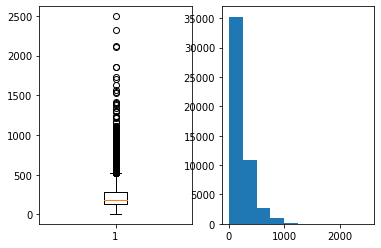

In [20]:
# Plot review length as a boxplot and histogram
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

Simple Multilayer Perceptron Model

In [0]:
# Import modules
# import numpy as np
# from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [0]:
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# Load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [0]:
# Truncate each sentence to a number of words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [25]:
# Create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)




Train on 25000 samples, validate on 25000 samples
Epoch 1/2





25000/25000 [==============================] - 12s 474us/step - loss: 0.4451 - acc: 0.7693 - val_loss: 0.2865 - val_acc: 0.8804
Epoch 2/2
25000/25000 [==============================] - 2s 91us/step - loss: 0.1555 - acc: 0.9433 - val_loss: 0.3311 - val_acc: 0.8647


In [27]:
# Final Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.2f%%' %(scores[1]*100))

Accuracy: 86.47%


One-Dimensional Convnet

In [0]:
# Import modules
from keras.layers.convolutional import Conv1D, MaxPooling1D
# import other modules as expected
# Fix random seed
# Load the dataset with top_words and split into train and test
# Pad dataset to a maximum review length in words

In [0]:
# Create model
def base_m():
  model = Sequential()
  model.add(Embedding(top_words, 32, input_length=max_words))
  model.add(Conv1D(32, 3, padding='same', activation='relu'))
  model.add(MaxPooling1D(2))
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [42]:
# Instantiate and fit model
model=base_m()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 7s 299us/step - loss: 0.5047 - acc: 0.7132 - val_loss: 0.2808 - val_acc: 0.8825
Epoch 2/2
25000/25000 [==============================] - 3s 101us/step - loss: 0.2305 - acc: 0.9088 - val_loss: 0.2762 - val_acc: 0.8834


In [43]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%'%(scores[1]*100))

Accuracy: 88.34%


In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________